<a href="https://colab.research.google.com/github/NewTAs/GoogLeNet/blob/main/Lee_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf

from google.colab import drive
drive.mount('Lee_dataset')

Mounted at Lee_dataset


In [2]:
numberOfClass = 2
pictureWeightHeightSize = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_dataset/11/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),
        batch_size=numberOfClass,
        class_mode='categorical')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/Lee_dataset/MyDrive/Lee_dataset/12/',
        target_size=(pictureWeightHeightSize, pictureWeightHeightSize),    
        batch_size=numberOfClass,
        class_mode='categorical')

Found 360 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications import ResNet50

model = ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=2)

In [4]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
model.fit(train_generator, epochs=100, validation_data=test_generator)

Epoch 1/100
180/180 [==============================] - 108s 504ms/step - loss: 1.1755 - accuracy: 0.6500 - val_loss: 1.4338 - val_accuracy: 0.5000
Epoch 2/100
180/180 [==============================] - 23s 127ms/step - loss: 0.7425 - accuracy: 0.7389 - val_loss: 1.9779 - val_accuracy: 0.5000
Epoch 3/100
180/180 [==============================] - 23s 127ms/step - loss: 0.6428 - accuracy: 0.7667 - val_loss: 8.5067 - val_accuracy: 0.5000
Epoch 4/100
180/180 [==============================] - 23s 127ms/step - loss: 0.5435 - accuracy: 0.7583 - val_loss: 9.3578 - val_accuracy: 0.5000
Epoch 5/100
180/180 [==============================] - 23s 127ms/step - loss: 0.3873 - accuracy: 0.8361 - val_loss: 0.3846 - val_accuracy: 0.8500
Epoch 6/100
180/180 [==============================] - 23s 127ms/step - loss: 0.2901 - accuracy: 0.8889 - val_loss: 0.2014 - val_accuracy: 0.9083
Epoch 7/100
180/180 [==============================] - 23s 127ms/step - loss: 0.3148 - accuracy: 0.8778 - val_loss: 1.6810 

In [6]:
print("-- Evaluate --")
scores = model.evaluate(test_generator)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
60/60 [==============================] - 2s 39ms/step - loss: 0.0036 - accuracy: 1.0000
accuracy: 100.00%


In [7]:
import matplotlib.pyplot as plt

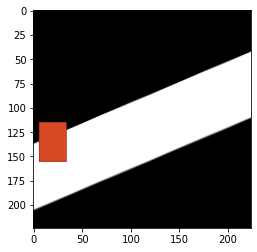

In [8]:
img_path = '/content/Lee_dataset/MyDrive/Lee_dataset/13/001.png'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [9]:
for i in range(9):
  img_path = '/content/Lee_dataset/MyDrive/Lee_dataset/13/00' + str(i+1)+'.png'
  img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  img_preprocessed = tf.keras.applications.resnet50.preprocess_input(img_batch)
  prediction = model.predict(img_preprocessed)
  print(prediction)

[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
[[1. 0.]]
